In [2]:
import pandas as pd
from descargar_imagenes_clases import euvi_downloader
from descargar_imagenes_clases import aia_downloader
from descargar_imagenes_clases import convert_string
import sunpy.map
import sunpy.data.sample 
from descargar_imagenes_clases import initial_final_time
import astropy.units as u
from astropy.io import fits
from sunpy.net import Fido, attrs as a
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import pdb
import numpy as np
import requests
import warnings
warnings.filterwarnings("ignore")
# Specify the file path
file_path = "/data_local/Descargas/DatesandTimesCMEs-SRcharacteristics.csv"

# Read the CSV file
data = pd.read_csv(file_path)

# Display the data
#print(data)

In [3]:
data_short = data.iloc[0:18].copy()
data_short['EUV loops data start time'] 

0      2010/12/12 1:00:00
1     2010/12/14 14:50:00
2        2011/03/17 10:00
3      2011/06/05 3:00:00
4     2013/01/23 12:00:00
5      2013/01/29 0:00:00
6      2013/02/09 5:00:00
7      2013/04/24 4:00:00
8      2013/05/02 4:00:00
9     2013/05/17 18:00:00
10    2013/05/27 16:00:00
11    2013/06/07 22:00:00
12     No sirve, stealth 
13     2011/04/27 5:00:00
14     2011/05/23 0:00:00
15     2013/01/16 5:00:00
16    2013/01/23 18:00:00
17     2013/01/27 5:00:00
Name: EUV loops data start time, dtype: object

In [4]:
data2=data_short[['Instrument','EUV loops data start time','EUV loops data end time']].copy()
data2

,Instrument,EUV loops data start time,EUV loops data end time
0,AIA,2010/12/12 1:00:00,2010/12/12 15:00:00
1,EUVI-A,2010/12/14 14:50:00,2010/12/14 23:59:00
2,EUVI-B,2011/03/17 10:00,2011/03/17 22:00
3,AIA,2011/06/05 3:00:00,2011/06/05 16:00:00
4,AIA,2013/01/23 12:00:00,2013/01/23 20:00:00
5,AIA,2013/01/29 0:00:00,2013/01/29 8:00:00
6,AIA,2013/02/09 5:00:00,2013/02/09 12:00:00
7,EUVI-B,2013/04/24 4:00:00,2013/04/24 18:00:00
8,AIA,2013/05/02 4:00:00,2013/05/02 12:00:00
9,EUVI-B,2013/05/17 18:00:00,2013/05/18 10:00:00


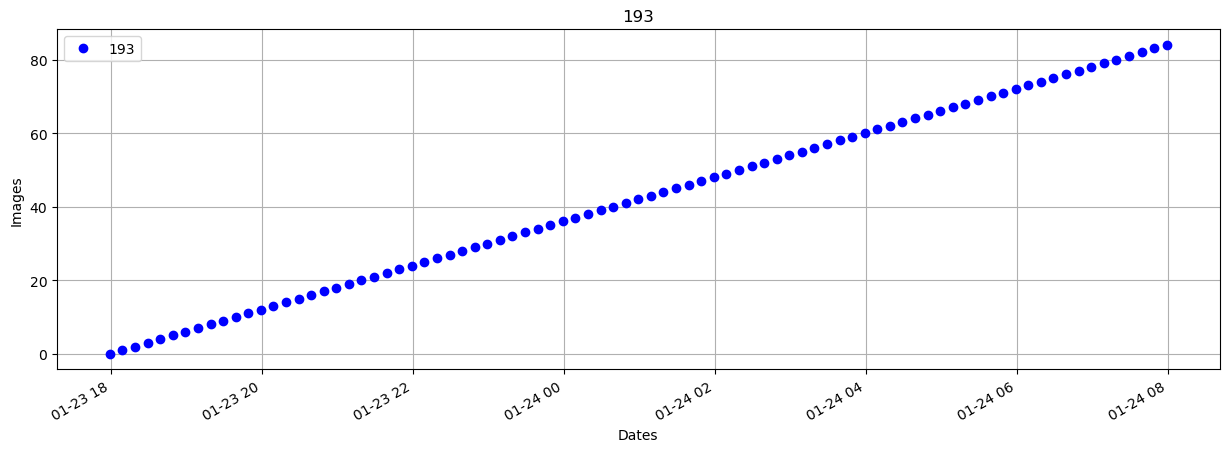

In [27]:
#AIA
#index = 0
#index = 3
#index = 4
#index = 5
#index = 6
#index = 8
#index = 14
index = 16
ini=data2.iloc[index]['EUV loops data start time'].replace('/', '-')
fin=data2.iloc[index]['EUV loops data end time'].replace('/', '-')
t_ini=ini
t_fin=fin
ini,fin = initial_final_time(t_ini, t_fin, delta_t=1)
aia_images = aia_downloader(start_time=ini,end_time=fin,cadence=10,wave=193,origin_download_path=True,band_folder=True)
aia_images.search()
aia_images.display()

In [ ]:
aia_images.download()

In [ ]:
aia_images.decompress()

In [9]:
aia_images.dir_descarga

'/media/gehme/gehme/data/sdo/aia/l1/193/20110605/'